<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/Taller2_Elbow_PCA_Venelina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [306]:
df = pd.read_csv("/content/Country Risk 2019 Data.csv")
df

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021


In [307]:
df.describe()

,Corr,Peace,Legal,GDP Growth
count,121.000000,121.000000,121.000000,121.000000
mean,46.842975,2.001017,5.752529,2.657529
std,18.702499,0.461485,1.373932,2.563741
min,15.000000,1.072000,2.671000,-9.459000
25%,33.000000,1.699000,4.785000,1.249000
50%,41.000000,1.939000,5.455000,2.600000
75%,60.000000,2.294000,6.488000,4.000000
max,87.000000,3.369000,8.712000,7.800000


# 1. Hacer la curva del codo y decidir el numero de clusters

In [308]:
#separating features from names, as we are interested only in features
features = ['Corr',	'Peace',	'Legal','GDP Growth']
names = ['Country',	'Abbrev']

#getting the values in array type of object
x_features=df.loc[:,features].values
y_names=df.loc[:,names].values

In [309]:
scaler = StandardScaler() #scaling
x_features_std =scaler.fit_transform(x_features) #standardizing -> this is the model to be used in the model

# Elbow method

Method to define the numbers of clusters

Typically expressed as a line plot between the number of clusters and their corresponding distortions.

There are two ways of getting the 'elbow' - using the built-in function in the Yellowbrick library or manually. I try both methods to ensure accuracy.

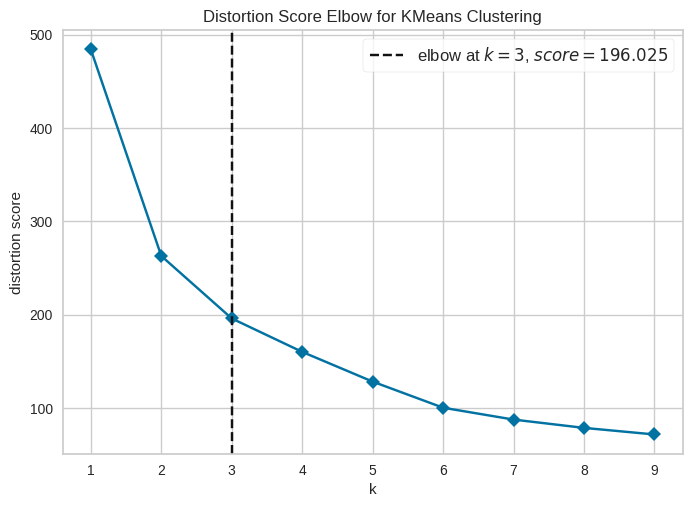

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [310]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=4)
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)

visualizer.fit(x_features_std)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/poof the datax

another way of getting the 'elbow', a bit more manual, in order to break down the process

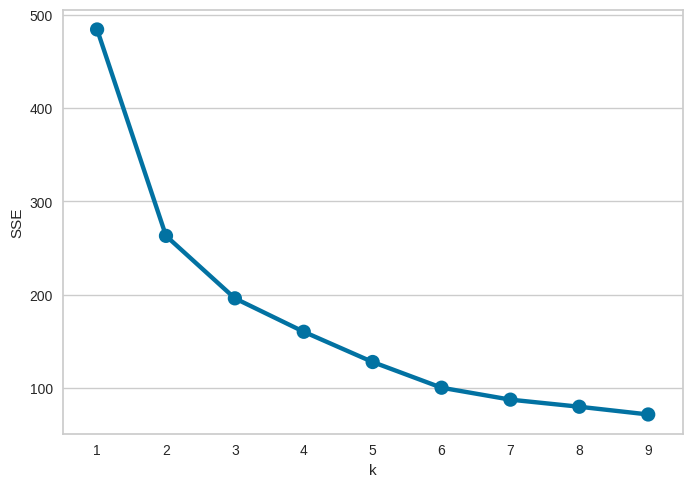

In [311]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(x_features_std)
  sse[k] = kmeans.inertia_

plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

codigo del taller

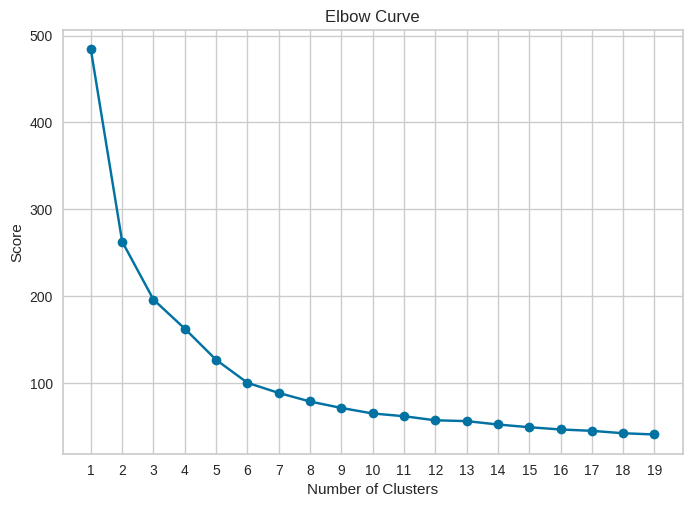

In [312]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [(-1)*(kmeans[i].fit(x_features_std).score(x_features_std)) for i in range(len(kmeans))]
plt.plot(Nc,score,marker='o')
plt.xticks(np.arange(min(Nc), max(Nc)+1, 1.0))
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Conclusion from the elbow method:

3 clusters


# 2. Hacer la clasification con los clusters sugeridos.

In [313]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_features_std)
cluster_labels = kmeans.labels_

# 3. Definir cada grupo: darle nombre de acuerdo al promedio en las variables

In [314]:
df_clustered=df.assign(Cluster = cluster_labels)
df_clustered.groupby(df_clustered['Cluster']).mean().round(2)

,Corr,Peace,Legal,GDP Growth
Cluster,,,,
0,30.32,2.57,4.61,-0.11
1,37.52,2.08,5.10,4.18
2,68.90,1.59,7.30,1.99


In [315]:
df_clustered.groupby(df_clustered['Cluster']).mean().round(2).sort_values('GDP Growth', ascending = False)

,Corr,Peace,Legal,GDP Growth
Cluster,,,,
1,37.52,2.08,5.10,4.18
2,68.90,1.59,7.30,1.99
0,30.32,2.57,4.61,-0.11


Cluster 1 - medium corruption, high growth - emerging countries

Cluster 2 - low corruption, good growth - stable countries

Cluster 0 - high corruption, no growth - poor countries

In [316]:
conditions = [
    (df_clustered["Cluster"] == 2),
    (df_clustered["Cluster"] == 1),
    (df_clustered["Cluster"] == 0)
]

values = ['Stable', 'Emerging', 'Poor']

df_clustered["Cluster_Name"] = np.select(conditions, values)
df_clustered

,Country,Abbrev,Corr,Peace,Legal,GDP Growth,Cluster,Cluster_Name
0,Albania,AL,35,1.821,4.546,2.983,1,Emerging
1,Algeria,DZ,35,2.219,4.435,2.553,1,Emerging
2,Argentina,AR,45,1.989,5.087,-3.061,0,Poor
3,Armenia,AM,42,2.294,4.812,6.000,1,Emerging
4,Australia,AU,77,1.419,8.363,1.713,2,Stable
...,...,...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400,2,Stable
117,Vietnam,VI,37,1.877,5.084,6.500,1,Emerging
118,Yemen,YE,15,3.369,2.671,2.113,0,Poor
119,Zambia,ZM,34,1.805,4.592,2.021,1,Emerging


# 4. Hay un grupo mayoritario? cual?

In [317]:
majority_group = df_clustered["Cluster_Name"].mode().values[0]
print(f"Majority group is: {majority_group}")

Majority group is: Emerging


In [318]:
cluster_sizes = [sum(cluster_labels == i) for i in range(3)]
cluster_sizes

[22, 58, 41]

# 5. Hacer el grafico de los clusters sobre las dos primeras componentes.


Plot with Corruption and GDP Growth

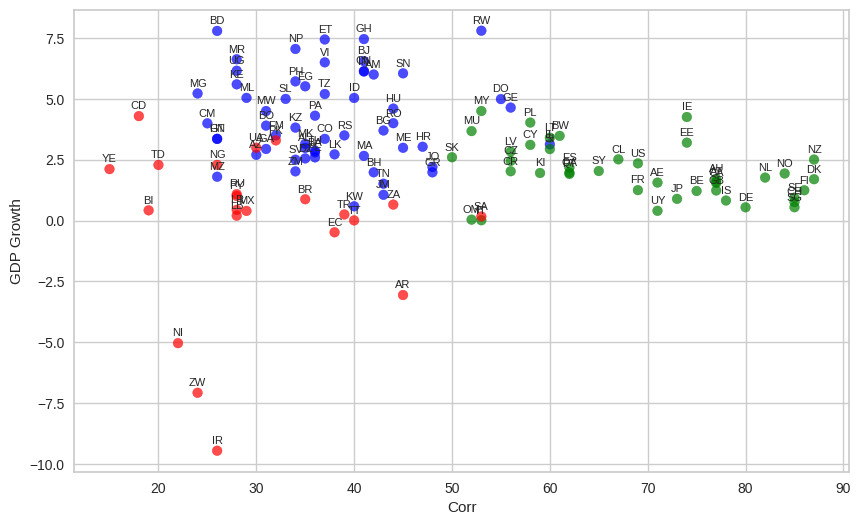

In [319]:
plt.figure(figsize=(10, 6))

colors = df_clustered["Cluster_Name"].map({"Emerging": "blue", "Poor": "red", "Stable": "green"})

plt.scatter(df_clustered['Corr'], df_clustered['GDP Growth'], c=colors, alpha = 0.7)
plt.xlabel('Corr')
plt.ylabel('GDP Growth')

#scatter point labels
for i in range(len(df_clustered)):
    plt.annotate(f"{df_clustered['Abbrev'][i]}", (df_clustered["Corr"][i], df_clustered["GDP Growth"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()

# Resumen